In [1]:
#%reset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from num2words import num2words
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
oversample = RandomOverSampler(sampling_strategy = 0.5,random_state=10) #need for neural network and random forest


In [42]:
data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')
data_by_HSA['health_service_area_number']
data_by_HSA['health_service_area']
data_by_HSA['HSA_ID'] = data_by_HSA['health_service_area_number'].astype(str) + '' + data_by_HSA['health_service_area'].apply(lambda x: x.split()[0])
data_by_HSA['beds_over_15_100k'] = (data_by_HSA['beds_weekly'] > 15)*1

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_29744/1909216443.py:1: DtypeWarning: Columns (41,43,44,45,46,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')


/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_29744/1087529800.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels =np.array(range(0, 131, 10)), rotation = 0, fontsize=10)


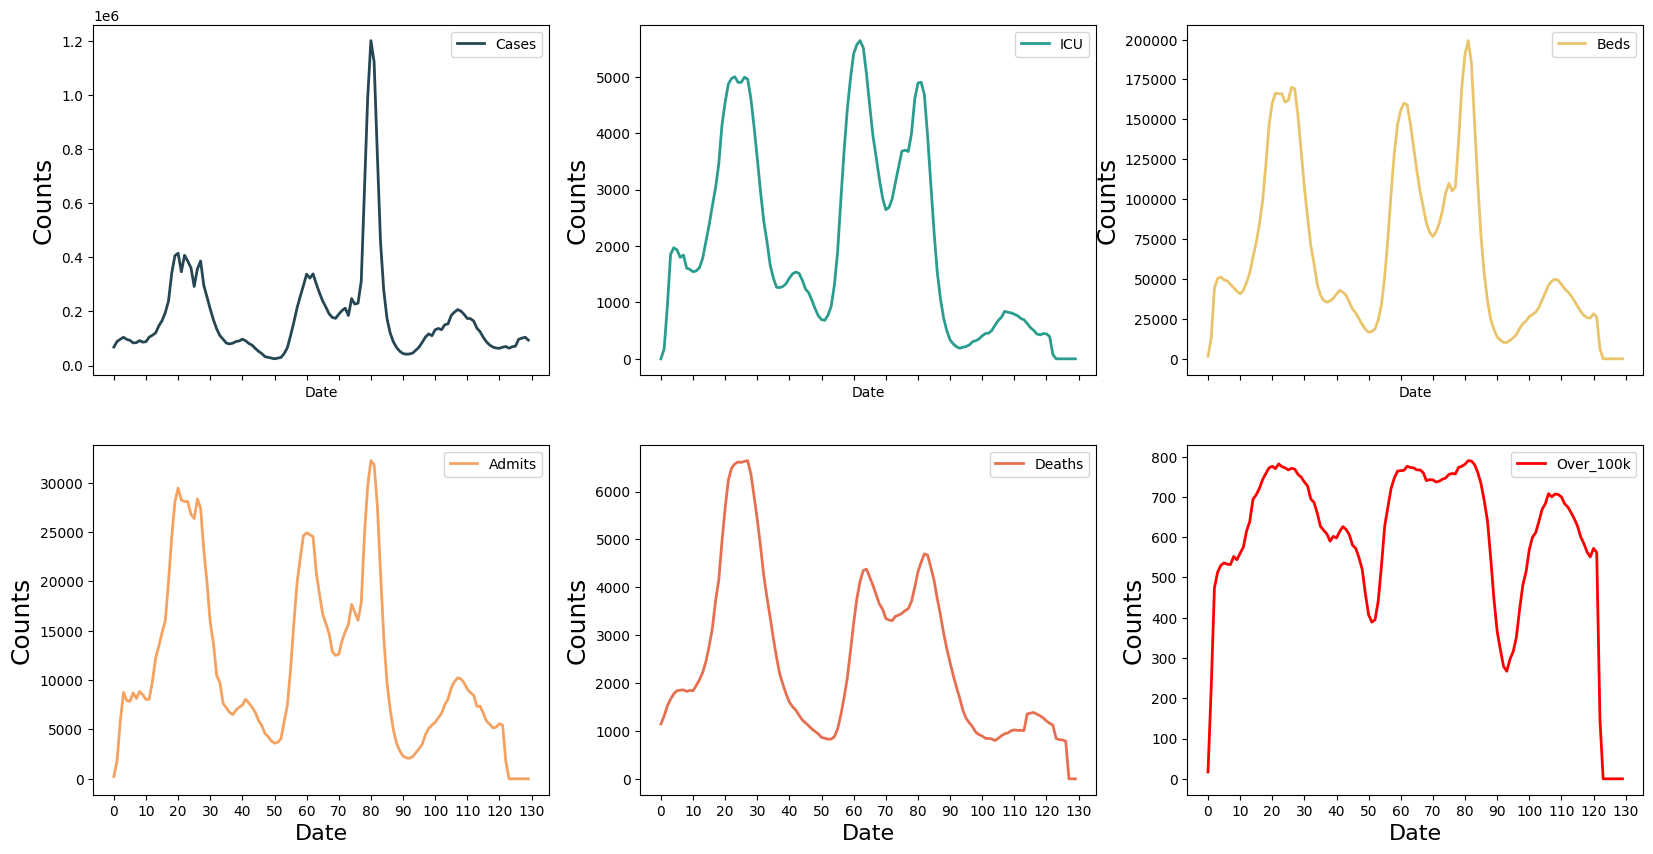

<Figure size 640x480 with 0 Axes>

In [44]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts", fontsize = 18)
axs[3].set_ylabel("Counts", fontsize = 18)
axs[1].set_ylabel("", fontsize = 18)
axs[2].set_ylabel("", fontsize = 18)
axs[4].set_ylabel("", fontsize = 18)
axs[5].set_ylabel("", fontsize = 18)

axs[3].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[4].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[5].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('date')
i = 0

for column in columns_to_plot:
        if column == 'beds_over_15k':
                axs[i].plot(weekly_groups['date'].first(), weekly_groups.isnull().sum(axis=1), label = labels[i], color = colours[i], linewidth = 2)
        else:
                axs[i].plot(weekly_groups['date'].first(), weekly_groups[column].sum(), label = labels[i], color = colours[i], linewidth = 2)
                axs[i].legend()
                axs[i].set_xlabel('Date')
                axs[i].set_ylabel('Counts')
                axs[i].set_xticklabels(labels =np.array(range(0, 131, 10)), rotation = 0, fontsize=10)
                axs[i].set_xticks(ticks =  np.array(range(0, 131, 10)), labels = np.array(range(0, 131, 10)), rotation = 0, fontsize=10)

                        

        i += 1

plt.show()

plt.savefig('Graphs/Time_trends_July_2020_November_2022.png', dpi = 300)

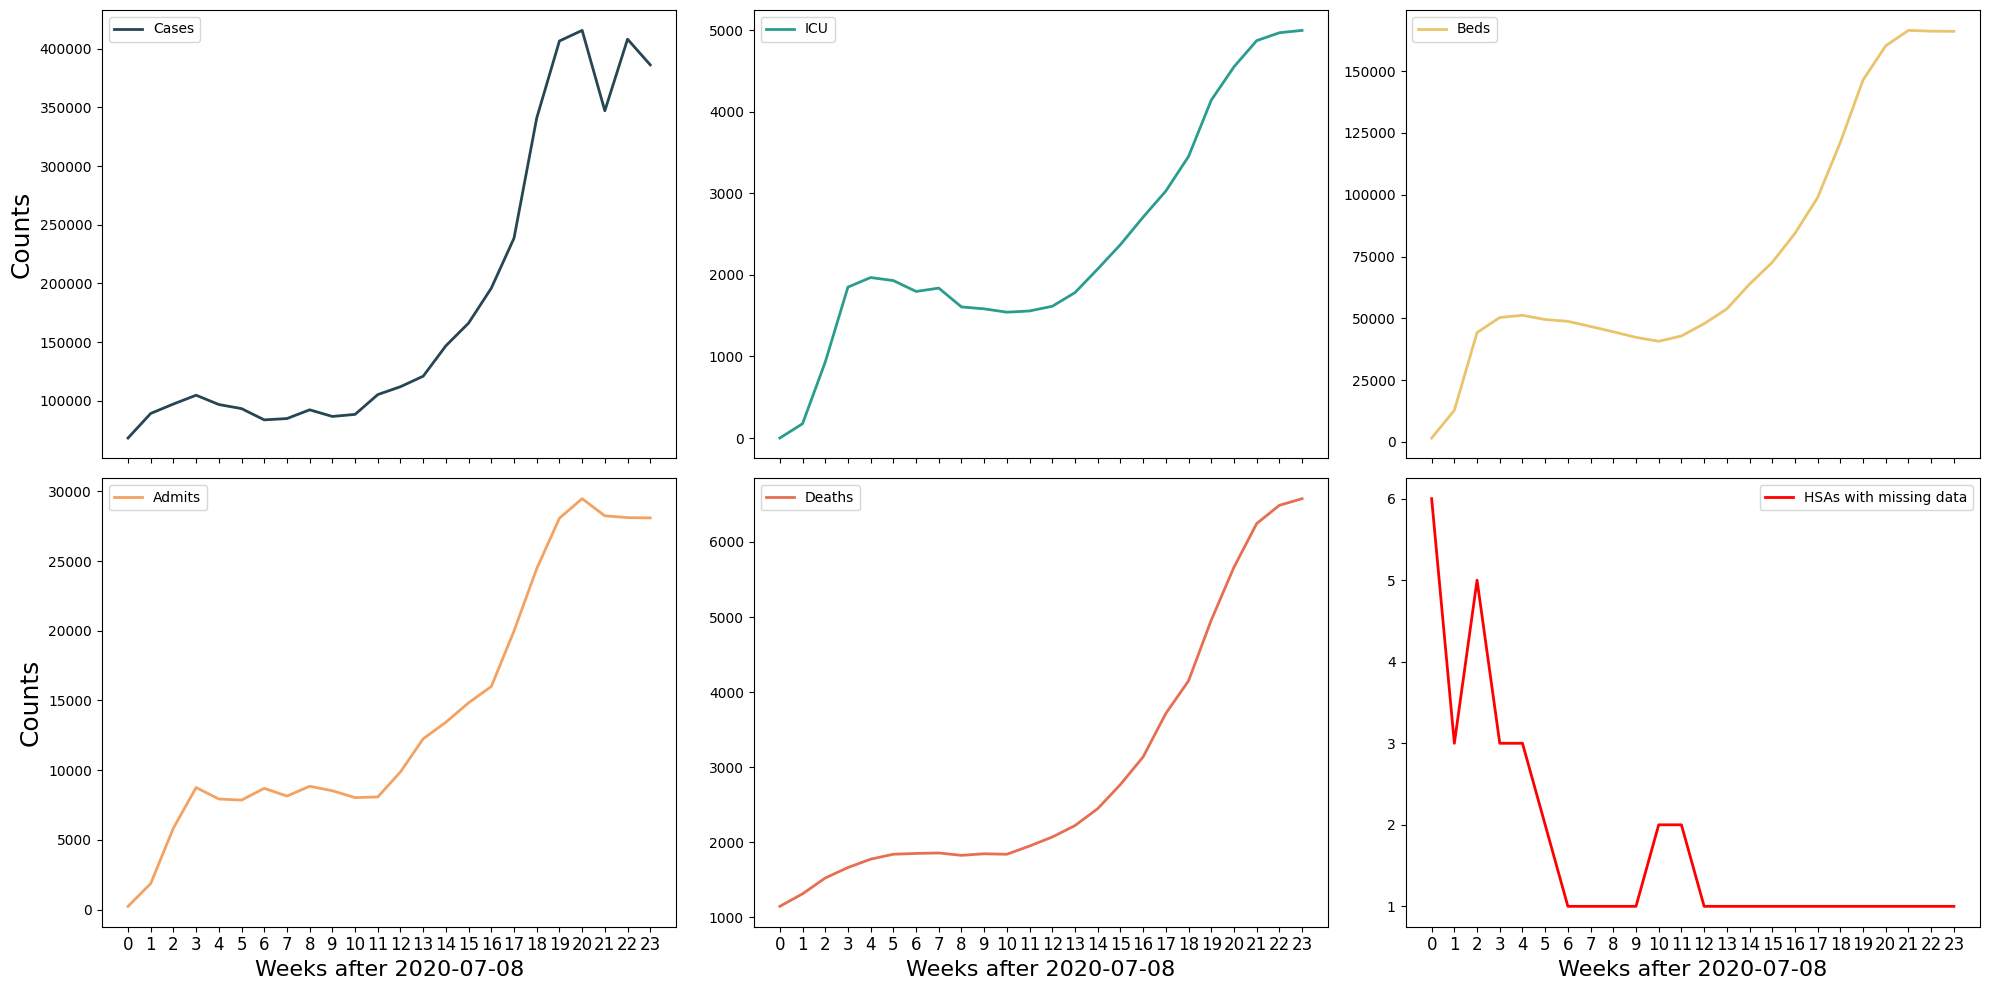

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].tick_params(axis='both', which='both', labelsize=10)
axs[1].tick_params(axis='both', which='both', labelsize=10)
axs[2].tick_params(axis='both', which='both', labelsize=10)
axs[3].tick_params(axis='both', which='both', labelsize=10)
axs[4].tick_params(axis='both', which='both', labelsize=10)
axs[5].tick_params(axis='both', which='both', labelsize=10)

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('date')
i = 0

axs[0].set_ylabel("Counts", fontsize = 18)
axs[3].set_ylabel("Counts", fontsize = 18)
axs[3].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[4].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[5].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
for column in columns_to_plot:
    if column == 'beds_over_15_100k':
        missing_data_counts = weekly_groups.apply(lambda x: x['beds_weekly'].isnull().sum())
        axs[i].plot(weekly_groups['date'].first(), missing_data_counts,
                    label='HSAs with missing data', color=colours[i], linewidth=2)
    else:
        axs[i].plot(weekly_groups['date'].first(), weekly_groups[column].sum(),
                    label=labels[i], color=colours[i], linewidth=2)

    axs[i].legend()

    axs[i].set_xticks(range(len(data_by_HSA['date'].unique())))
    axs[i].set_xticklabels(labels=range(len(data_by_HSA['date'].unique())), rotation=0, fontsize=12)

    i += 1
plt.tight_layout()

plt.savefig('Graphs/Time_trends_July_December.png', dpi = 300)

In [22]:
weekly_groups['date'].first()

date
2020-07-08    2020-07-08
2020-07-15    2020-07-15
2020-07-22    2020-07-22
2020-07-29    2020-07-29
2020-08-05    2020-08-05
2020-08-12    2020-08-12
2020-08-19    2020-08-19
2020-08-26    2020-08-26
2020-09-02    2020-09-02
2020-09-09    2020-09-09
2020-09-16    2020-09-16
2020-09-23    2020-09-23
2020-09-30    2020-09-30
2020-10-07    2020-10-07
2020-10-14    2020-10-14
2020-10-21    2020-10-21
2020-10-28    2020-10-28
2020-11-04    2020-11-04
2020-11-11    2020-11-11
2020-11-18    2020-11-18
2020-11-25    2020-11-25
2020-12-02    2020-12-02
2020-12-09    2020-12-09
2020-12-16    2020-12-16
Name: date, dtype: object